###### University of Chicago
###### CMSC 25900: Ethics, Fairness, Responsibility, and Privacy in Data Science, Spring 2020
###### Course Staff: Blase Ur, Galen Harrison, Raul Castro Fernandez, Weijia He

## Dawei Huang

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import randMethod

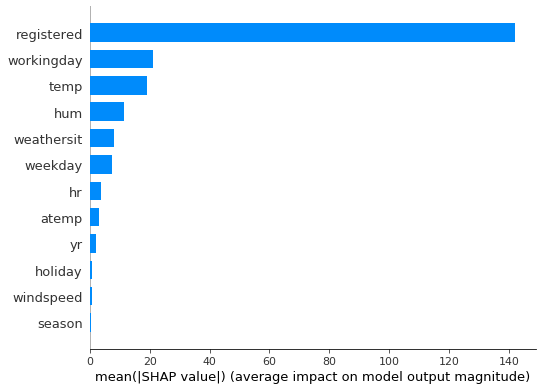

In [3]:
# importing the required libraries
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

data = pd.read_csv('hour.csv')
dataSamp = data.sample(n=100)

X = dataSamp[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']]
y = dataSamp['cnt']


# Need to load JS vis in the notebook
shap.initjs()

from sklearn.metrics import accuracy_score

reg = LinearRegression().fit(X, y)
reg.score(X, y)
pred = reg.predict(X)
pred

explainer = shap.KernelExplainer(reg.predict, X[:100])
shap_values = explainer.shap_values(X[:100])
shap.summary_plot(shap_values, X[:100], plot_type="bar")

In [280]:
data = pd.read_csv('hour.csv')
X = data[['season','yr','hr','holiday','weekday','workingday','weathersit','hum','windspeed','registered','temp']][:100]
y = data['cnt'][:100]
reg = LinearRegression().fit(X, y)
reg.score(X, y)
predinit = reg.predict(X)
init = reg.score(X, y)
reg.score(X, y)

0.9813169302219897

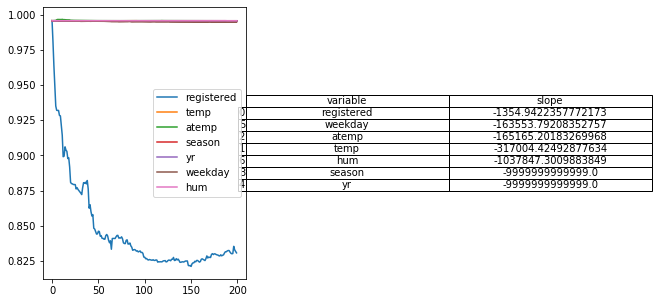

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('hour.csv')
dataSamp = data.sample(n=100)

X = data[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']][:100]
y = data['cnt'][:100]
    
randMethod.createGraph(X,y,['registered','temp','atemp','season','yr','weekday','hum'],200, LinearRegression()) 

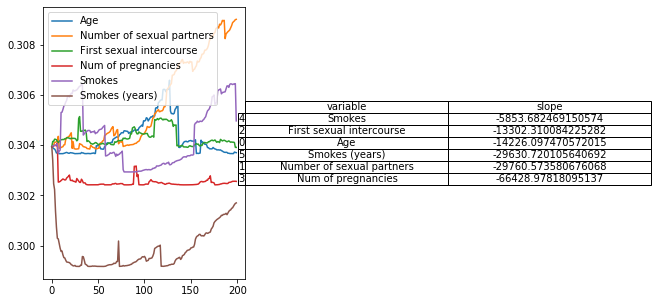

In [4]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

data = pd.read_csv('risk_factors_cervical_cancer.csv')

data = data.replace('?','0')
for x in data.columns:
    data[x] = pd.to_numeric(data[x], downcast="float")

X = data.loc[:, data.columns != 'Biopsy']
y = data['Biopsy']

#data['Age'] = data['Age'].astype(float)

#randMethod.createGraph(X,y,['Age','STDs'],200)
#type(data['STDs'][0])
data
#randMethod.createGraph(X,y,['Age'],200)

randMethod.createGraph(X,y,list(X.columns)[:6],200,LinearRegression())

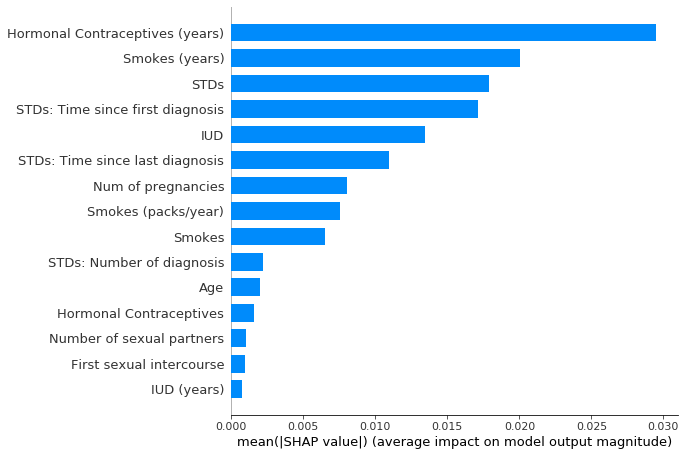

In [404]:
# Need to load JS vis in the notebook
shap.initjs()

from sklearn.metrics import accuracy_score

reg = LinearRegression().fit(X, y)
reg.score(X, y)
pred = reg.predict(X)
pred

explainer = shap.KernelExplainer(reg.predict, X[:50])
shap_values = explainer.shap_values(X[:50])
shap.summary_plot(shap_values, X[:50], plot_type="bar")

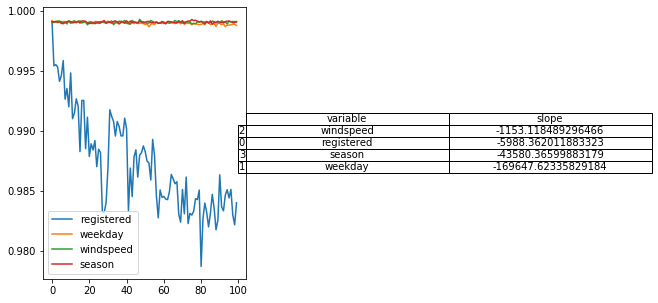

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('hour.csv')
dataSamp = data.sample(n=100)

X = data[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']][:100]
y = data['cnt'][:100]

randMethod.createGraph(X,y,['registered','weekday','windspeed','season'],100,RandomForestRegressor())

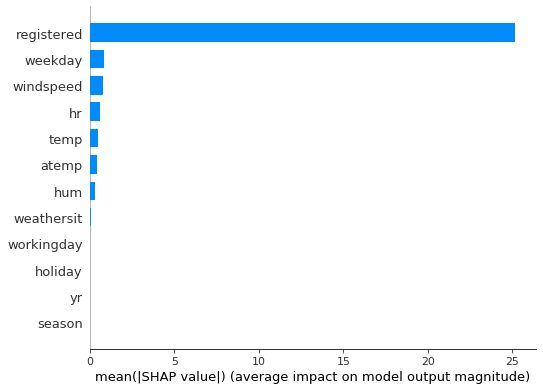

In [504]:
# Need to load JS vis in the notebook
shap.initjs()

from sklearn.metrics import accuracy_score

reg = RandomForestRegressor().fit(X, y)
reg.score(X, y)
pred = reg.predict(X)
pred

explainer = shap.KernelExplainer(reg.predict, X[:50])
shap_values = explainer.shap_values(X[:50])
shap.summary_plot(shap_values, X[:50], plot_type="bar")

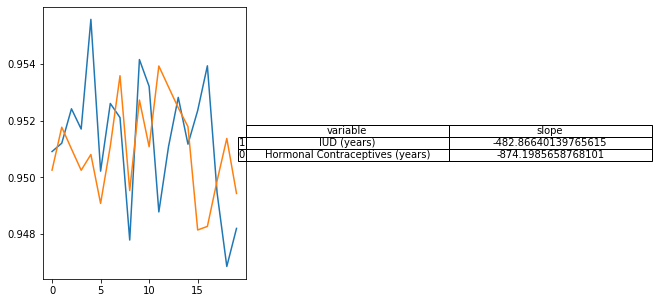

In [407]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')

data = data.replace('?','0')
for x in data.columns:
    data[x] = pd.to_numeric(data[x], downcast="float")

    
data['STDs'] = data['STDs'].astype(int)
X = data.loc[:, data.columns != 'Biopsy']
y = data['Biopsy']

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
# Train the model on training data
rf.fit(X, y);
predictions = rf.predict(X)
list(predictions)

randMethod.createGraph(X,y,['Hormonal Contraceptives (years)','IUD (years)'],20,RandomForestRegressor)

In [399]:
data


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
2,34.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0,0.0,0.0,0.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0,0.0,0.0,0.0,0.0


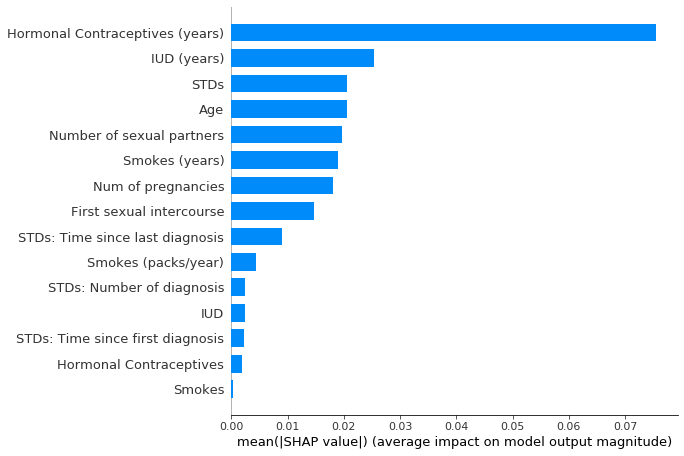

In [402]:
# Need to load JS vis in the notebook
shap.initjs()

from sklearn.metrics import accuracy_score

reg = RandomForestRegressor().fit(X, y)
reg.score(X, y)
pred = reg.predict(X)
pred

explainer = shap.KernelExplainer(reg.predict, X[:50])
shap_values = explainer.shap_values(X[:50])
shap.summary_plot(shap_values, X[:50], plot_type="bar")

In [403]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
2,34.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0,0.0,0.0,0.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0,0.0,0.0,0.0,0.0


In [472]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
#from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

data = pd.read_csv('hour.csv')

X = data[['registered']]
y = data['cnt']

#createGraph(X,y,['registered'],20,DecisionTreeClassifier())
listGen('registered',20,X,y,DecisionTreeClassifier())


17379

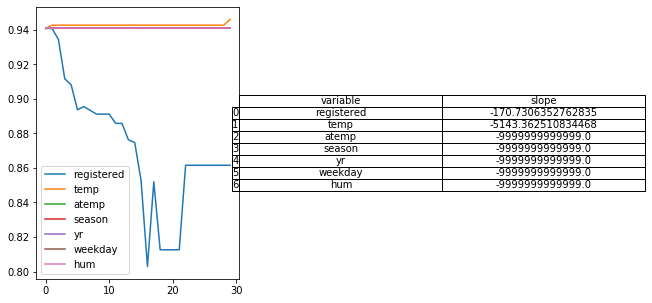

In [498]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('hour.csv')

X = data[['season','yr','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered']][:100]
y = data['cnt'][:100]
    
randMethod.createGraph(X,y,['registered','temp','atemp','season','yr','weekday','hum'],30, DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) )
#listGen('registered',20,X,y,DecisionTreeClassifier())

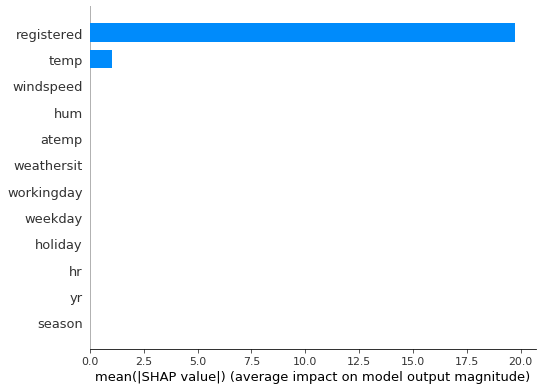

In [496]:
# Need to load JS vis in the notebook
shap.initjs()

from sklearn.metrics import accuracy_score

reg = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5).fit(X, y)
reg.score(X, y)
pred = reg.predict(X)
pred

explainer = shap.KernelExplainer(reg.predict, X[:50])
shap_values = explainer.shap_values(X[:50])
shap.summary_plot(shap_values, X[:50], plot_type="bar")